# Importing The required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the format
pd.set_option('display.max.rows',200)
pd.set_option('display.max.columns',200)
pd.set_option('float_format', '{:.2f}'.format)

# Uploading the Dataset application_data

In [3]:
#Reading the New application dataset with read_csv command
New_app= pd.read_csv('application_data.csv')

In [4]:
#Checking the first 5 rows 
New_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [5]:
# Checking the shape - no. of rows, no. of coloumns
New_app.shape

(307511, 122)

In [6]:
# Info of dataset
New_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Checking the coloumns with missing values and arranging them in descending order
Missing = New_app.isnull().mean()*100
Missing.sort_values(ascending=False)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

In [8]:
# Limiting the dataset by dropping the coloumns with more than 40% of missing values
New_app = New_app.loc[:, New_app.isnull().mean() <= 0.4]
New_app.shape

(307511, 73)

# Imputation and Handling of Outliers 

In [9]:
# Checking the missing percenatge of remaining coloumns for purpose of imputation and outliers handling
M = New_app.isnull().mean()*100
M.sort_values(ascending=False)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_17               0.00
FLAG_DOCUMENT_18               0.00
FLAG_DOCUMENT_21               0.00
FLAG_DOCUMENT_20               0.00
FLAG_DOCUMENT_19               0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_16            

Imputing Missing Values

In [10]:
#EXT_SOURCE_3 
New_app.EXT_SOURCE_3.dtype

dtype('float64')

In [11]:
New_app.EXT_SOURCE_3.describe()

count   246546.00
mean         0.51
std          0.19
min          0.00
25%          0.37
50%          0.54
75%          0.67
max          0.90
Name: EXT_SOURCE_3, dtype: float64

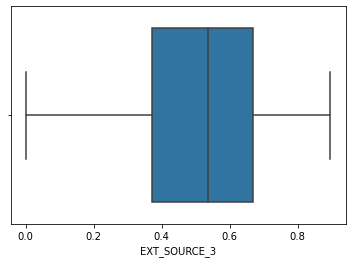

In [12]:
# Checking if their is any outlier with help of boxplot
sns.boxplot(New_app.EXT_SOURCE_3)
plt.show()

# From the above boxplot we can see that their are no outliers. Hence we can use mean to replace missing values

In [13]:
New_app.EXT_SOURCE_3.fillna(New_app.EXT_SOURCE_3.mean(), inplace=True)
New_app.EXT_SOURCE_3.isnull().sum()

0

In [14]:
#OCCUPATION_TYPE
New_app.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [15]:
# Since OCCUPATION_TYPE is a categorical variable we can use "Others" to replace missing values
New_app.OCCUPATION_TYPE.fillna('Others', inplace=True)
New_app.OCCUPATION_TYPE.isnull().sum()

0

In [16]:
New_app.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied     81.16
Family            13.11
Spouse, partner    3.71
Children           1.07
Other_B            0.58
Other_A            0.28
Group of people    0.09
Name: NAME_TYPE_SUITE, dtype: float64

In [17]:
# Imputing with mode value - 'Unaccompanied'
New_app.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)
New_app.NAME_TYPE_SUITE.isnull().sum()

0

In [18]:
New_app.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         1.42
std          2.40
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

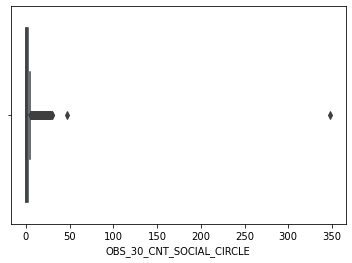

In [19]:
sns.boxplot(New_app.OBS_30_CNT_SOCIAL_CIRCLE)

In [20]:
# Their are outliers in OBS_30_CNT_SOCIAL_CIRCLE hence imputing with the median
New_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(New_app.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
New_app.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [21]:
New_app.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         0.14
std          0.45
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [22]:
New_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(New_app.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
New_app.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [23]:
New_app.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         1.41
std          2.38
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

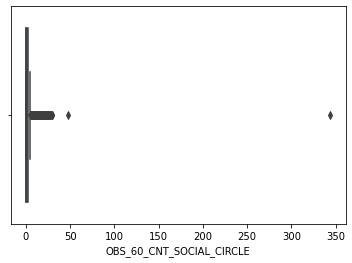

In [24]:
sns.boxplot(New_app.OBS_60_CNT_SOCIAL_CIRCLE)

In [25]:
New_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(New_app.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
New_app.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [26]:
New_app.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         0.10
std          0.36
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [27]:
New_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(New_app.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
New_app.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [28]:
New_app.EXT_SOURCE_2.describe()

count   306851.00
mean         0.51
std          0.19
min          0.00
25%          0.39
50%          0.57
75%          0.66
max          0.85
Name: EXT_SOURCE_2, dtype: float64

<AxesSubplot:xlabel='EXT_SOURCE_2'>

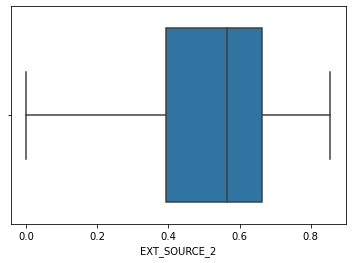

In [29]:
sns.boxplot(New_app.EXT_SOURCE_2)

In [30]:
New_app.EXT_SOURCE_2.fillna(New_app.EXT_SOURCE_2.median(), inplace=True)
New_app.EXT_SOURCE_2.isnull().sum()

0

In [31]:
New_app.AMT_GOODS_PRICE.describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

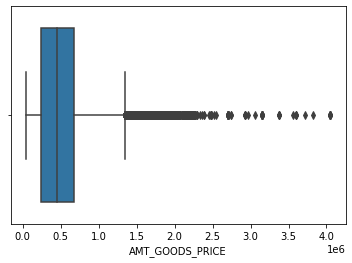

In [32]:
sns.boxplot(New_app.AMT_GOODS_PRICE)

In [33]:
New_app.AMT_GOODS_PRICE.median()

450000.0

In [34]:
New_app.AMT_GOODS_PRICE.fillna(New_app.AMT_GOODS_PRICE.median(), inplace=True)
New_app.AMT_GOODS_PRICE.isnull().sum()

0

In [35]:
New_app.AMT_ANNUITY.describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [36]:
New_app.AMT_ANNUITY.median()

24903.0

In [37]:
New_app.AMT_ANNUITY.fillna(New_app.AMT_ANNUITY.median(), inplace=True)
New_app.AMT_ANNUITY.isnull().sum()

0

In [38]:
New_app.CNT_FAM_MEMBERS.describe()

count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [39]:
New_app.CNT_FAM_MEMBERS.fillna(New_app.CNT_FAM_MEMBERS.median(), inplace=True)
New_app.CNT_FAM_MEMBERS.isnull().sum()

0

In [40]:
New_app.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00
mean      -962.86
std        826.81
min      -4292.00
25%      -1570.00
50%       -757.00
75%       -274.00
max          0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [41]:
New_app.DAYS_LAST_PHONE_CHANGE.fillna(New_app.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)
New_app.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [42]:
# Dropping the unrequired variables
New_app.drop(['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'], axis=1, inplace=True)
New_app.shape

(307511, 67)

In [43]:
New_app.AMT_INCOME_TOTAL.describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

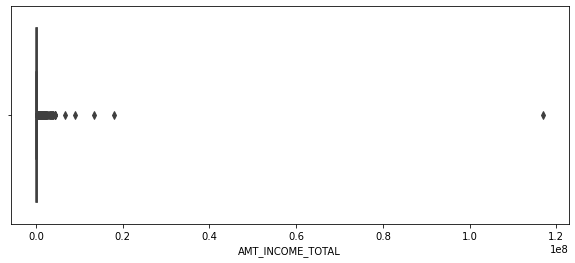

In [44]:
plt.figure(figsize=[10,4])
sns.boxplot(New_app.AMT_INCOME_TOTAL)
plt.show()

In [45]:
New_app.AMT_INCOME_TOTAL.quantile([0.25, 0.5, 0.75, 0.9, 0.99, 1])

0.25      112500.00
0.50      147150.00
0.75      202500.00
0.90      270000.00
0.99      472500.00
1.00   117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

From the box plot and quantiles we can clearly see that their are outliers in AMT_INCOME_TOTAL so we can limit the range till 90th percentile 

<AxesSubplot:>

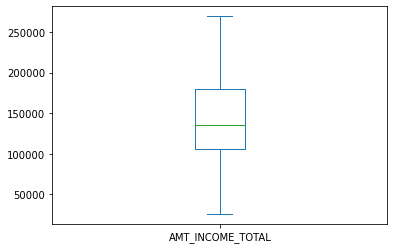

In [46]:
New_app[New_app['AMT_INCOME_TOTAL']<np.quantile(New_app['AMT_INCOME_TOTAL'],0.9)]['AMT_INCOME_TOTAL'].plot.box()

The Above boxplot clearly reflects that limiting to 90th Percentile will remove the outliers. We can follow same approach for other Continous variables too and limit the data to respective percentiles

In [47]:
New_app.AMT_CREDIT.describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

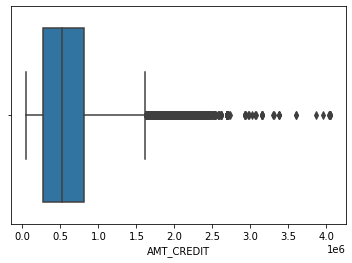

In [48]:
sns.boxplot(New_app.AMT_CREDIT)
plt.show()

In [49]:
New_app.AMT_CREDIT.quantile([0.25, 0.5, 0.75, 0.9,0.95,1])

0.25    270000.00
0.50    513531.00
0.75    808650.00
0.90   1133748.00
0.95   1350000.00
1.00   4050000.00
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:>

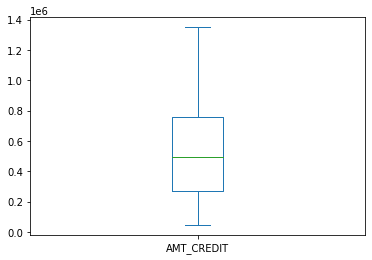

In [50]:
# Capping the AMT_CREDIT to 95th Percentile
New_app[New_app['AMT_CREDIT']<np.quantile(New_app['AMT_CREDIT'],0.95)]['AMT_CREDIT'].plot.box()

In [51]:
New_app.AMT_ANNUITY.describe()

count   307511.00
mean     27108.49
std      14493.46
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

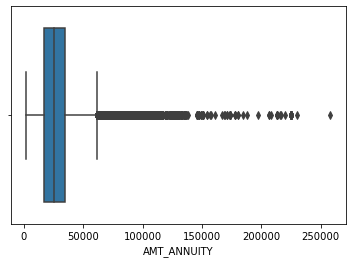

In [52]:
sns.boxplot(New_app.AMT_ANNUITY)
plt.show()

In [53]:
New_app.AMT_ANNUITY.quantile([0.5, 0.7,0.9,0.95,1])

0.50    24903.00
0.70    32004.00
0.90    45954.00
0.95    53325.00
1.00   258025.50
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

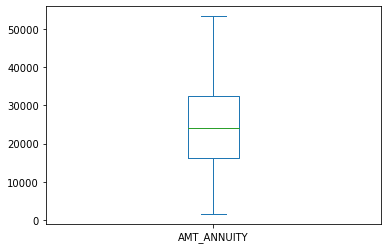

In [54]:
# Capping AMT_ANNUITY to 95th Percentile
New_app[New_app['AMT_ANNUITY']<np.quantile(New_app['AMT_ANNUITY'],0.95)]['AMT_ANNUITY'].plot.box()

In [55]:
New_app.AMT_GOODS_PRICE.describe()

count    307511.00
mean     538316.29
std      369288.98
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

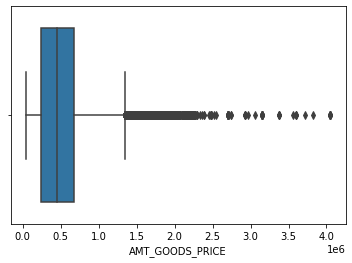

In [56]:
sns.boxplot(New_app.AMT_GOODS_PRICE)

In [57]:
New_app.AMT_GOODS_PRICE.quantile([0.5,0.7,0.9,0.95,1])

0.50    450000.00
0.70    675000.00
0.90   1093500.00
0.95   1305000.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:>

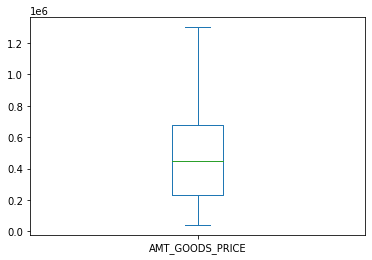

In [58]:
# Capping for AMT_GOODS_PRICE is at 95th Percentile
New_app[New_app['AMT_GOODS_PRICE']<np.quantile(New_app['AMT_GOODS_PRICE'],0.95)]['AMT_GOODS_PRICE'].plot.box()

In [59]:
# Converting coloumns with negative value into positive value using abs and loops
col_neg = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED'] #Creating list of all negative coloumns

for i in New_app[col_neg]:
    New_app[i] = abs(New_app[i])

In [60]:
New_app.DAYS_EMPLOYED.describe()

count   307511.00
mean     67724.74
std     139443.75
min          0.00
25%        933.00
50%       2219.00
75%       5707.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

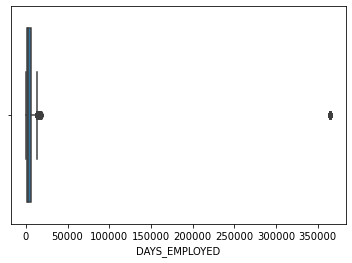

In [61]:
sns.boxplot(New_app.DAYS_EMPLOYED)

In [62]:
New_app.DAYS_EMPLOYED.quantile([0.65,0.7, 0.75])

0.65   3596.00
0.70   4435.00
0.75   5707.00
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

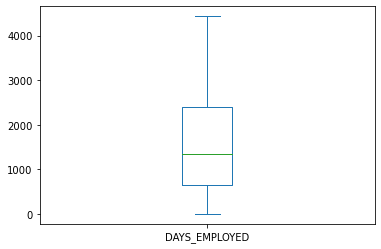

In [63]:
# Capping DAYS_EMPLOYED at 70th Percentile
New_app[New_app['DAYS_EMPLOYED']<np.quantile(New_app['DAYS_EMPLOYED'],0.7)]['DAYS_EMPLOYED'].plot.box()

# Binning and Grouping Continous Numerical Variables

In [64]:
New_app.AMT_INCOME_TOTAL.describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
# Grouping the Income into Low Medium High Very High Categories for ease of analysis based on income level.

def income_groups(x):
    if x <= 112500:
        return ('Low Income')
    elif x > 112500 and x <=147150:
        return ('Medium Income')
    elif x > 147150 and x <=202500:
        return ('High Income')
    else:
        return ('Very High Income')
    
New_app['Income_Groups'] = New_app['AMT_INCOME_TOTAL'].apply(income_groups)

In [66]:
New_app[['Income_Groups', 'AMT_INCOME_TOTAL']].head(15)

,Income_Groups,AMT_INCOME_TOTAL
0,High Income,202500.00
1,Very High Income,270000.00
2,Low Income,67500.00
3,Medium Income,135000.00
4,Medium Income,121500.00
5,Low Income,99000.00
6,High Income,171000.00
7,Very High Income,360000.00
8,Low Income,112500.00
9,Medium Income,135000.00


In [67]:
# Grouping the Credit Amount taken into particular categories
New_app.AMT_CREDIT.describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [68]:
def credit_categories(x):
    if x<=270000:
        return ('Low Credit')
    elif x>270000 and x<=513531:
        return ('Medium Credit')
    elif x>513531 and x<=808650:
        return ('High Credit')
    else:
        return ('Very High Credit')
    
New_app['Credit Categories'] = New_app.AMT_CREDIT.apply(credit_categories)

In [69]:
New_app[['Credit Categories', 'AMT_CREDIT']].head(15)

,Credit Categories,AMT_CREDIT
0,Medium Credit,406597.50
1,Very High Credit,1293502.50
2,Low Credit,135000.00
3,Medium Credit,312682.50
4,Medium Credit,513000.00
5,Medium Credit,490495.50
6,Very High Credit,1560726.00
7,Very High Credit,1530000.00
8,Very High Credit,1019610.00
9,Medium Credit,405000.00


In [70]:
New_app['Age'] = New_app['DAYS_BIRTH']//365
New_app['Age_Group'] = pd.cut(New_app['Age'], bins= np.arange(20,100,10))
New_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Income_Groups,Credit Categories,Age,Age_Group
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High Income,Medium Credit,25,"(20, 30]"
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,0.51,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Very High Income,Very High Credit,45,"(40, 50]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low Income,Low Credit,52,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,0.51,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium Income,Medium Credit,52,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,0.51,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium Income,Medium Credit,54,"(50, 60]"


# Checking the Imbalance in Dataset 

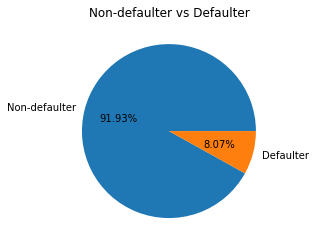

In [71]:
labels = ['Non-defaulter', 'Defaulter']
plt.pie(New_app['TARGET'].value_counts(normalize = True), labels = labels, autopct='%1.2f%%')
plt.title('Non-defaulter vs Defaulter')
plt.show()

From the Pie chart we can see that the dataset is highly imbalanced between Non-Defaulters and Defaulters. So, we need to divide the dataset and then perform the analysis.

In [72]:
# Dividing the Dataset between Defaulters and Non Defaulters
Non_Def = New_app[New_app['TARGET']==0]
Def = New_app[New_app['TARGET']==1]

In [73]:
Non_Def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Income_Groups,Credit Categories,Age,Age_Group
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,0.51,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Very High Income,Very High Credit,45,"(40, 50]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low Income,Low Credit,52,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,0.51,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium Income,Medium Credit,52,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,0.51,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium Income,Medium Credit,54,"(50, 60]"
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,477,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,0.62,0.00,0.00,0.00,0.00,-2536.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low Income,Medium Credit,46,"(40, 50]"


# Univariate Analysis of Categorical Variables

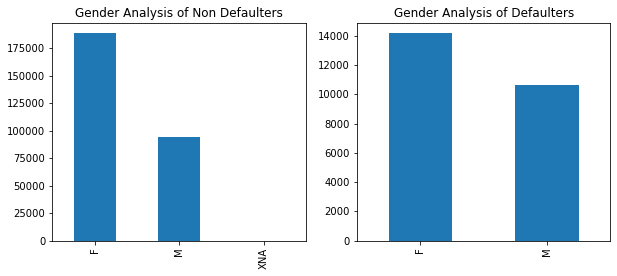

In [74]:
# Analysis on basis of Gender
plt.figure(figsize=[10,4])
plt.subplot(121)
Non_Def.CODE_GENDER.value_counts().plot.bar()
plt.title("Gender Analysis of Non Defaulters")
plt.subplot(122)
Def.CODE_GENDER.value_counts().plot.bar()
plt.title("Gender Analysis of Defaulters")
plt.show()

> The Number of Female Applicants are higher than Male applicants irrespecitve of being Defaulter or Non Defaulter

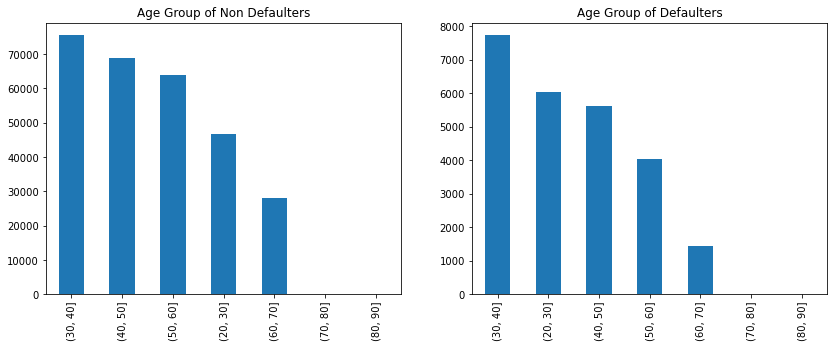

In [75]:
#Analysis on basis of Age Group
plt.figure(figsize=[14,5])
plt.subplot(121)
Non_Def.Age_Group.value_counts().plot.bar()
plt.title("Age Group of Non Defaulters")
plt.subplot(122)
Def.Age_Group.value_counts().plot.bar()
plt.title("Age Group of Defaulters")
plt.show()

> The highest number of loan applicants belongs to age group of 30 to 40 followed by 40 to 50.

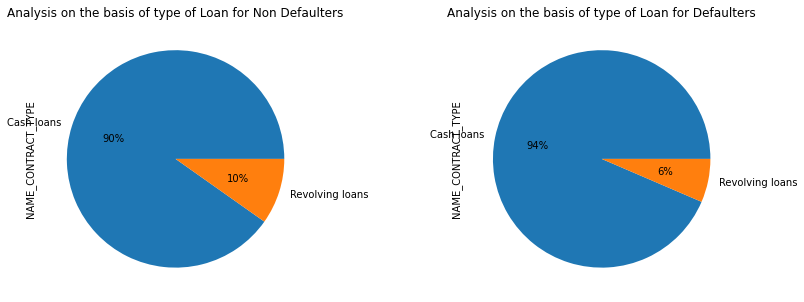

In [76]:
# Analysis on basis of Contract Type with clients
plt.figure(figsize=[14,5])
plt.subplot(121)
Non_Def.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Analysis on the basis of type of Loan for Non Defaulters")
plt.subplot(122)
Def.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Analysis on the basis of type of Loan for Defaulters")
plt.show()

Cash loan is applied much more in comparison to Revolving credit

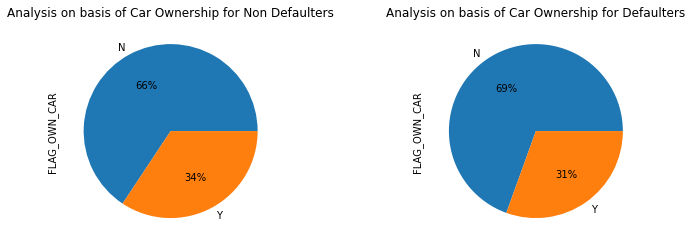

In [77]:
# Analysis based on Car Ownership
plt.figure(figsize=[12,4])
plt.subplot(121)
Non_Def.FLAG_OWN_CAR.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Analysis on basis of Car Ownership for Non Defaulters")
plt.subplot(122)
Def.FLAG_OWN_CAR.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Analysis on basis of Car Ownership for Defaulters")
plt.show()

More than 50% of loan applicants don't posses their own car for both the cases.

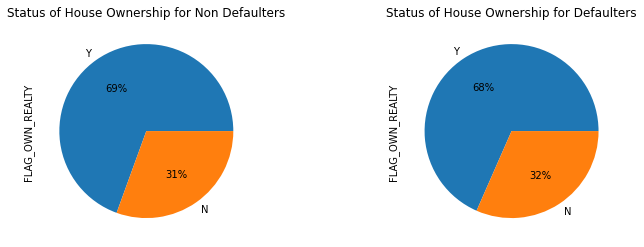

In [78]:
# Analysis on basis of House Ownership
plt.figure(figsize=[12,4])
plt.subplot(121)
Non_Def.FLAG_OWN_REALTY.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Status of House Ownership for Non Defaulters")
plt.subplot(122)
Def.FLAG_OWN_REALTY.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Status of House Ownership for Defaulters")
plt.show()

On Contrary to Car ownership, more than half of the loan applicants have their own house.

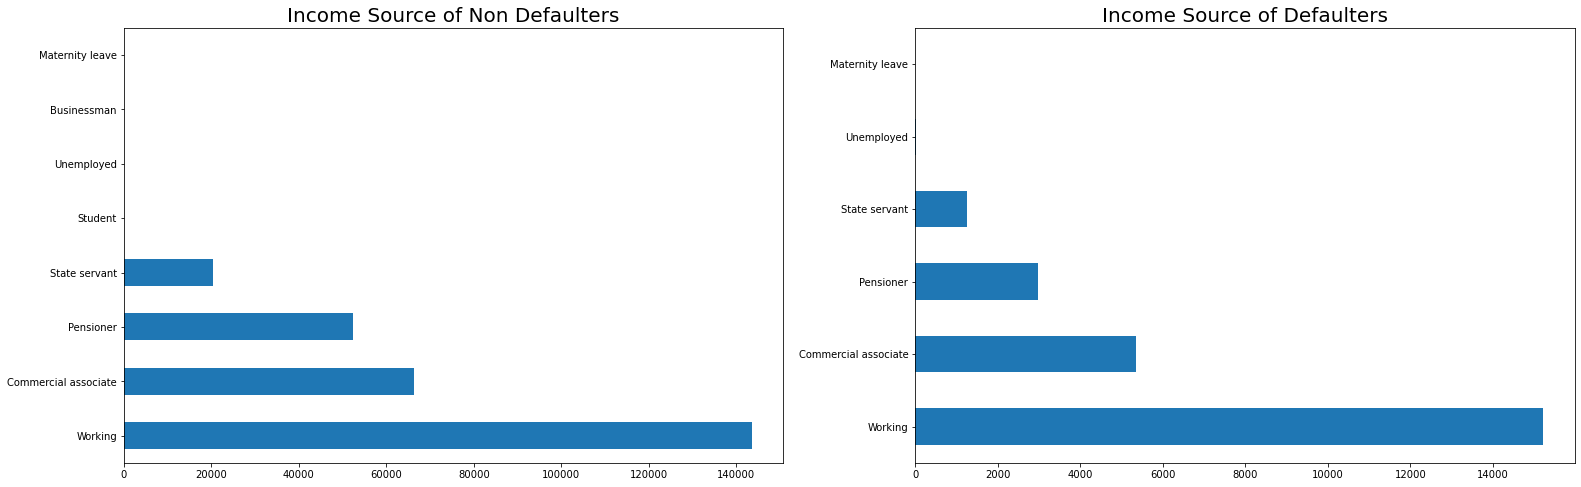

In [79]:
# Analysis on basis of income type of applicants
plt.figure(figsize=[26,8])
plt.subplot(121)
Non_Def.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Source of Non Defaulters", fontdict={'fontsize' : '20'})
plt.subplot(122)
Def.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Source of Defaulters", fontdict={'fontsize' : '20'})
plt.show()

The highest number of loan applicants belongs to working class.

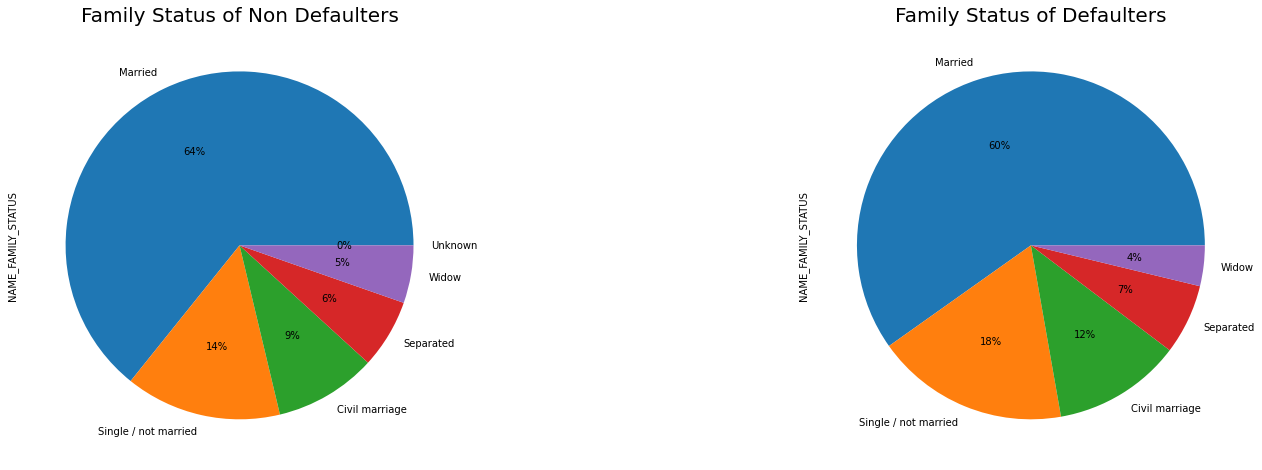

In [80]:
# Analysis on basis of Family Status
plt.figure(figsize=[26,8])
plt.subplot(121)
Non_Def.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Family Status of Non Defaulters", fontdict={'fontsize' : '20'})
plt.subplot(122)
Def.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Family Status of Defaulters", fontdict={'fontsize' : '20'})
plt.show()

The percentage of Married loan applicants is highest in comparison to other status for both Defaulters and Non Defaulters.

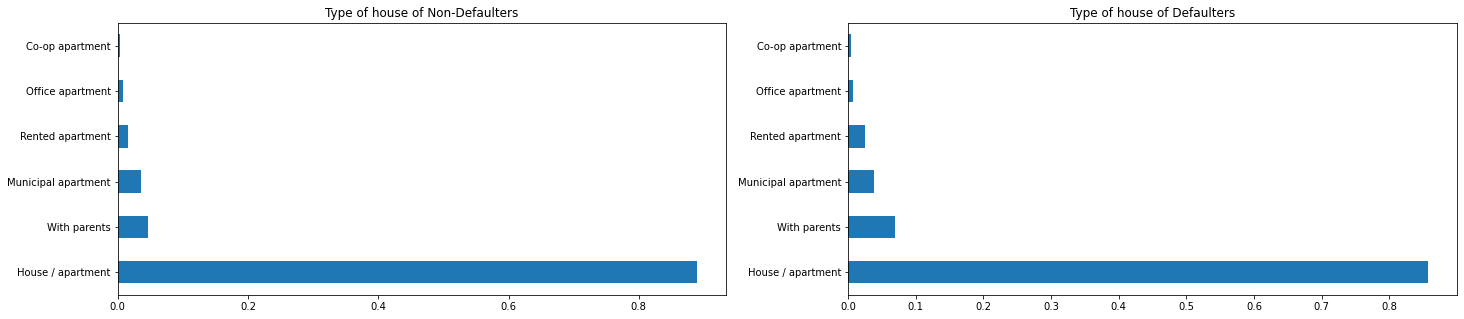

In [81]:
# Housing Type Analysis
plt.figure(figsize = [24,5])
plt.subplot(121)
Non_Def['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.barh()
plt.title('Type of house of Non-Defaulters')
plt.subplot(122)
Def['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.barh()
plt.title('Type of house of Defaulters')
plt.show()

Most of the applicants resides in house or apartments

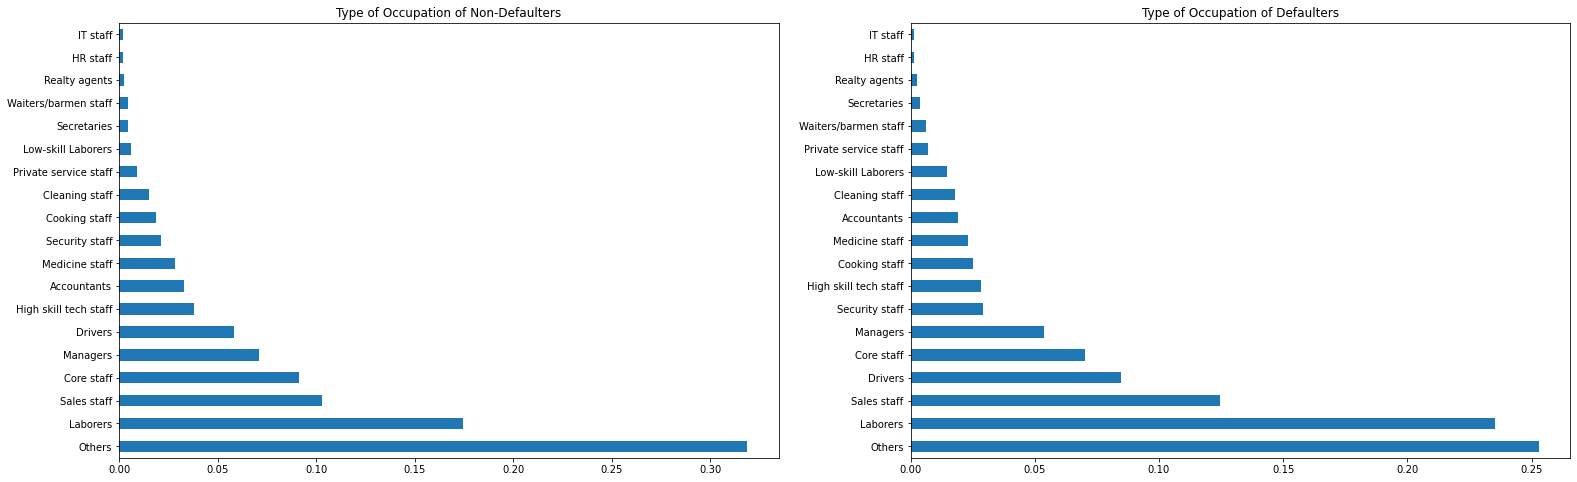

In [82]:
# Analysis on basis of occupation
plt.figure(figsize = [26,8])
plt.subplot(121)
Non_Def['OCCUPATION_TYPE'].value_counts(normalize = True).plot.barh()
plt.title('Type of Occupation of Non-Defaulters')
plt.subplot(122)
Def['OCCUPATION_TYPE'].value_counts(normalize = True).plot.barh()
plt.title('Type of Occupation of Defaulters')
plt.show()

**The top five occupations of those taking loans for both Non-Defaulters and Defaulters are as follows:**

- Others
- Laborers
- Sales Staff
- Core Staff
- Managers


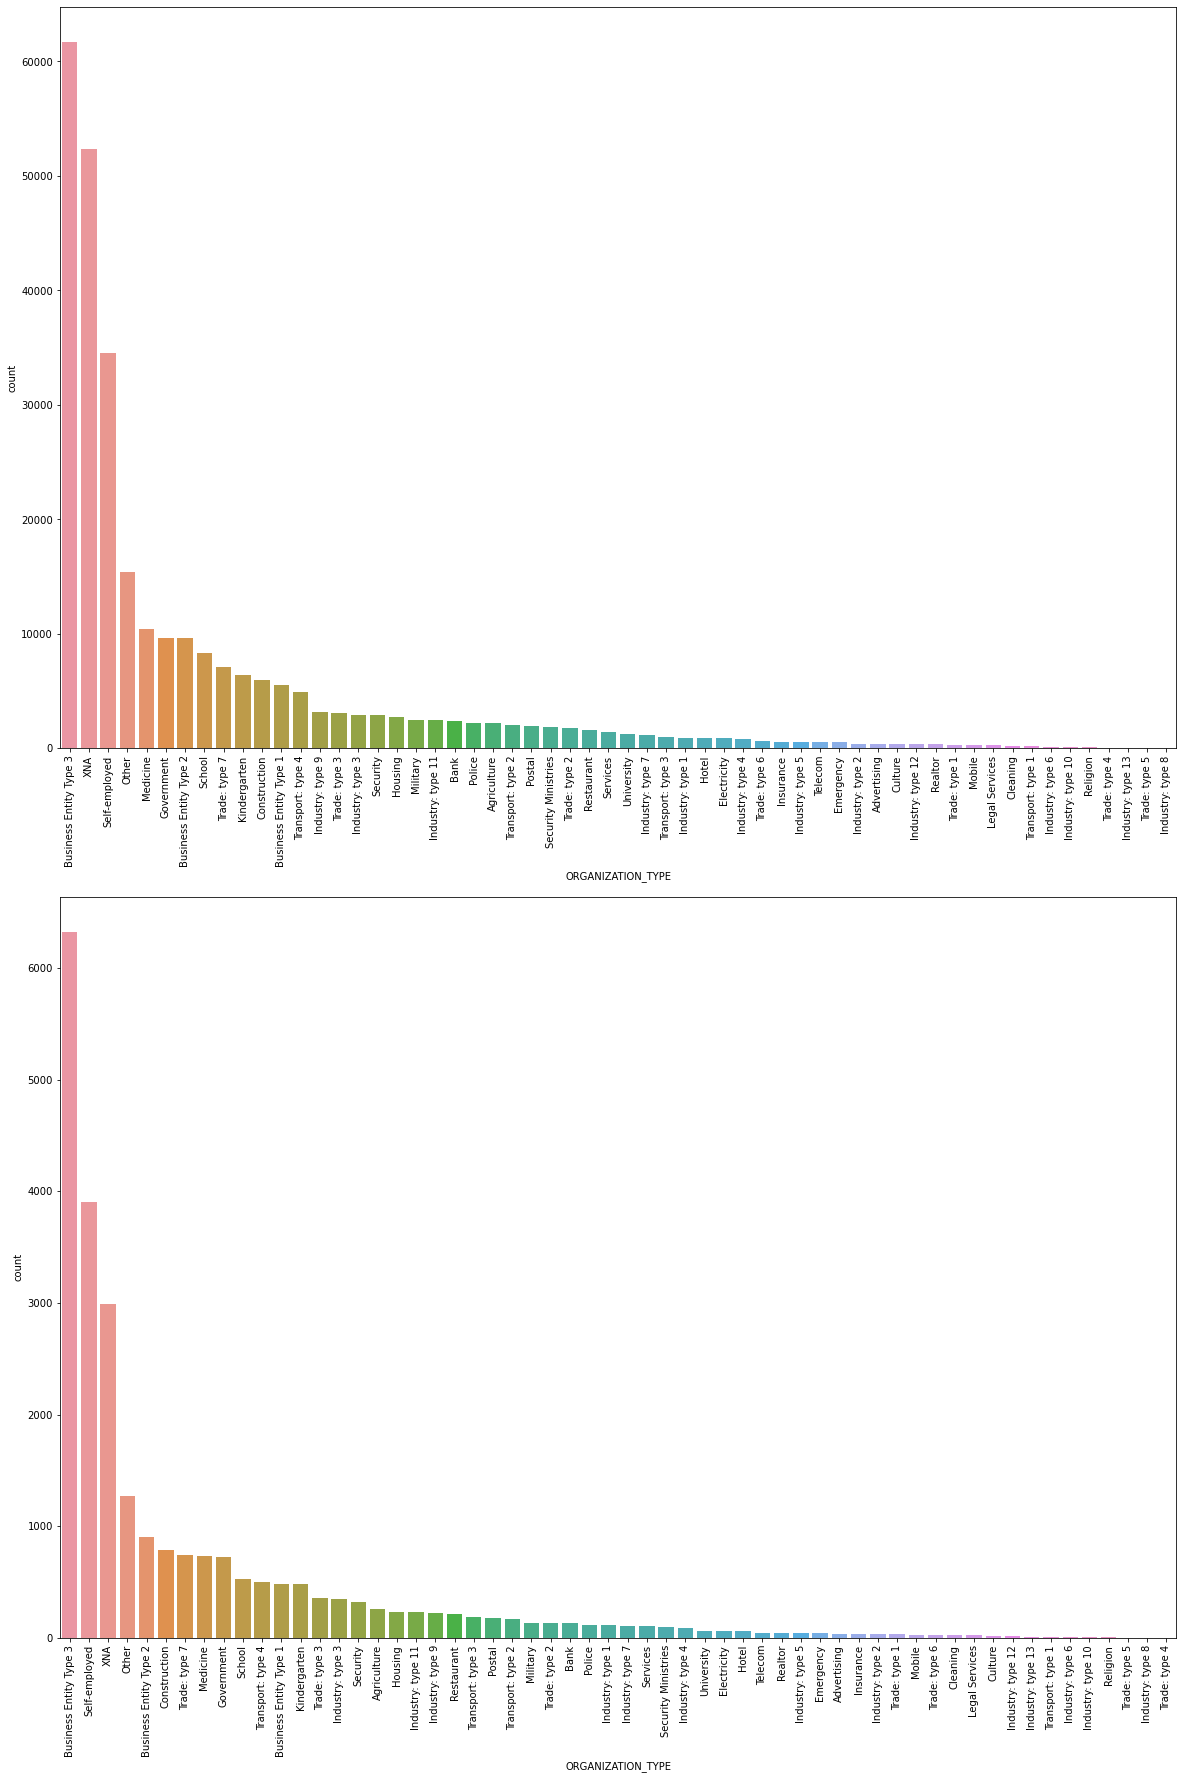

In [83]:
# Analysis on basis of Organization type
plt.figure(figsize = [20,30])
plt.subplot(211)
sns.countplot(data = Non_Def, x = 'ORGANIZATION_TYPE', order = Non_Def['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.subplot(212)
sns.countplot(data = Def, x = 'ORGANIZATION_TYPE', order = Def['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**The top 5 Client Organization type for Non Defaulters and Defaulters are**:-
- Business Entity type 3
- Self Employed
- XNA
- Other
- Business Entity type 2

# Univariate Categorical Ordered Analysis

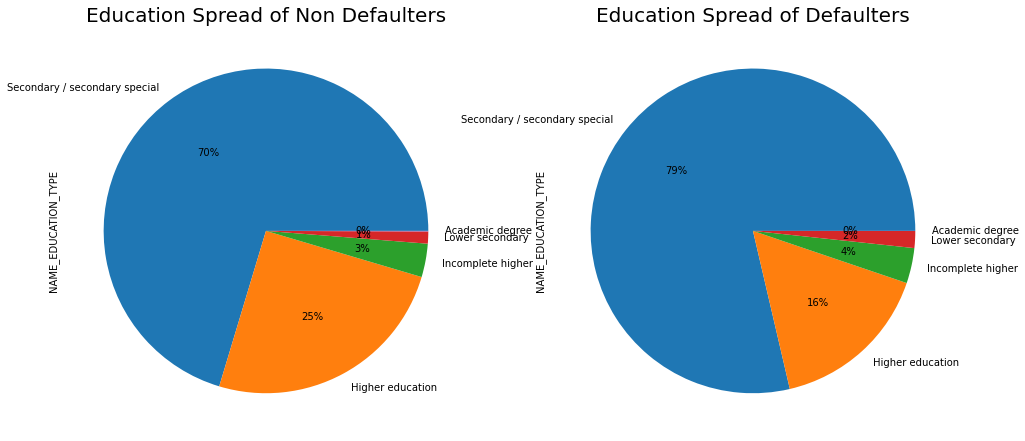

In [84]:
# Analysis on Basis of Education of Client
plt.figure(figsize=[16,10])
plt.subplot(121)
Non_Def.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Education Spread of Non Defaulters", fontdict={'fontsize' : '20'})
plt.subplot(122)
Def.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Education Spread of Defaulters", fontdict={'fontsize' : '20'})
plt.show()

- Highest Number of loan applicants have attained the Secondary level of education being it Defaulters or Non Defaulters

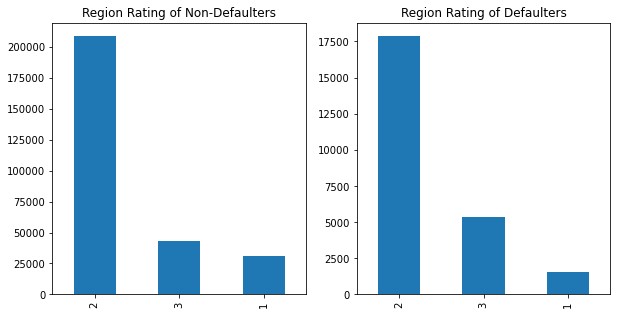

In [85]:
# Analysis on basis of Client Region Rating 
plt.figure(figsize = [10,5])
plt.subplot(121)
Non_Def['REGION_RATING_CLIENT'].value_counts().plot.bar()
plt.title('Region Rating of Non-Defaulters')
plt.subplot(122)
Def['REGION_RATING_CLIENT'].value_counts().plot.bar()
plt.title('Region Rating of Defaulters')
plt.show()

***The Highest Count of applicants belongs to region rating 2***.

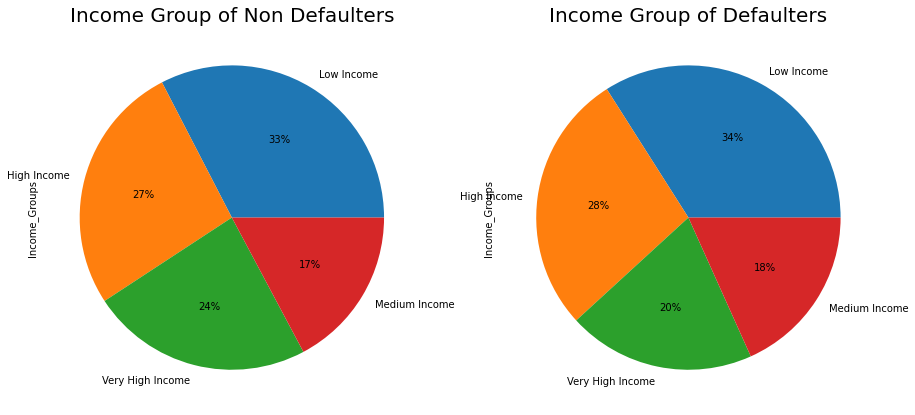

In [86]:
# Analysis of basis of Income Group
plt.figure(figsize=[15,7])
plt.subplot(121)
Non_Def.Income_Groups.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Income Group of Non Defaulters", fontdict={'fontsize' : '20'})
plt.subplot(122)
Def.Income_Groups.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Income Group of Defaulters", fontdict={'fontsize' : '20'})
plt.show()

- The Maximum Percentage of loan applicants pertains to Low Income level followed by High Income level.

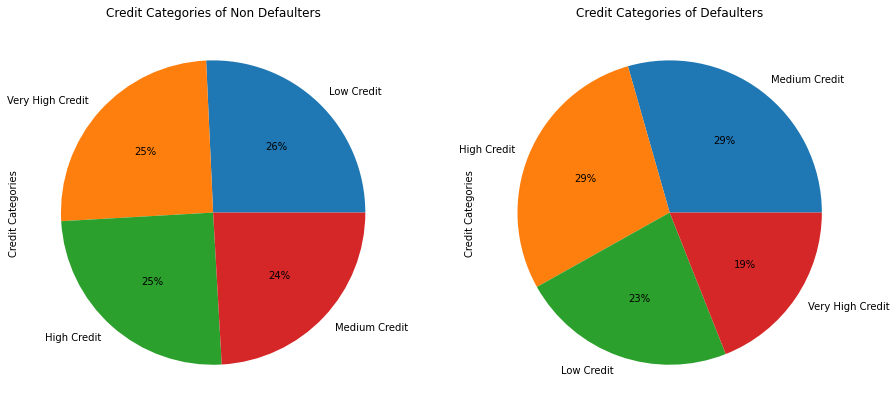

In [87]:
#Analysis on Basis of Credit Categories
plt.figure(figsize=[15,7])
plt.subplot(121)
Non_Def['Credit Categories'].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Credit Categories of Non Defaulters")
plt.subplot(122)
Def['Credit Categories'].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Credit Categories of Defaulters")
plt.show()

- Non Defaulters has applied for low credit whereas for Defaulters the percentage of loan with Medium credit is highest.

# Univariate Analysis of Continuous Variables

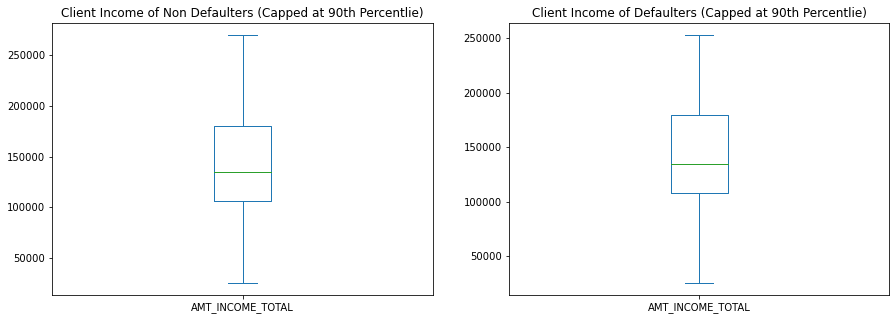

In [88]:
# Analysis on basis of AMT_INCOME_TOTAL	
plt.figure(figsize=[15,5])
plt.subplot(121)
Non_Def[Non_Def['AMT_INCOME_TOTAL']<np.quantile(Non_Def['AMT_INCOME_TOTAL'],0.90)]['AMT_INCOME_TOTAL'].plot.box()
plt.title('Client Income of Non Defaulters (Capped at 90th Percentlie)')
plt.subplot(122)
Def[Def['AMT_INCOME_TOTAL']<np.quantile(Def['AMT_INCOME_TOTAL'],0.90)]['AMT_INCOME_TOTAL'].plot.box()
plt.title('Client Income of Defaulters (Capped at 90th Percentlie)')
plt.show()

- The Income level for both categories capped to 90th Percentile to remove the outliers.
- We can see that the IQR and median for both categories is almost the same.

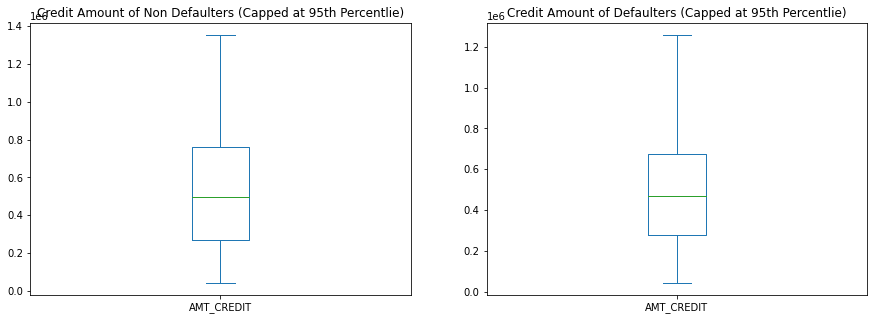

In [89]:
plt.figure(figsize=[15,5])
plt.subplot(121)
Non_Def[Non_Def['AMT_CREDIT']<np.quantile(Non_Def['AMT_CREDIT'],0.95)]['AMT_CREDIT'].plot.box()
plt.title('Credit Amount of Non Defaulters (Capped at 95th Percentlie)')
plt.subplot(122)
Def[Def['AMT_CREDIT']<np.quantile(Def['AMT_CREDIT'],0.95)]['AMT_CREDIT'].plot.box()
plt.title('Credit Amount of Defaulters (Capped at 95th Percentlie)')
plt.show()

- Credit Amount is capped at 95th percentile to remove the outliers
- Median is almost same for both categories

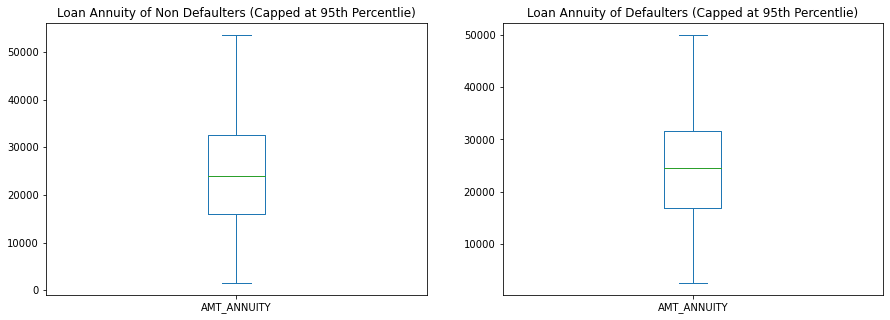

In [90]:
plt.figure(figsize=[15,5])
plt.subplot(121)
Non_Def[Non_Def['AMT_ANNUITY']<np.quantile(Non_Def['AMT_ANNUITY'],0.95)]['AMT_ANNUITY'].plot.box()
plt.title('Loan Annuity of Non Defaulters (Capped at 95th Percentlie)')
plt.subplot(122)
Def[Def['AMT_ANNUITY']<np.quantile(Def['AMT_ANNUITY'],0.95)]['AMT_ANNUITY'].plot.box()
plt.title('Loan Annuity of Defaulters (Capped at 95th Percentlie)')
plt.show()

- The Median and IQR for both categories is almost same for Loan Annuity

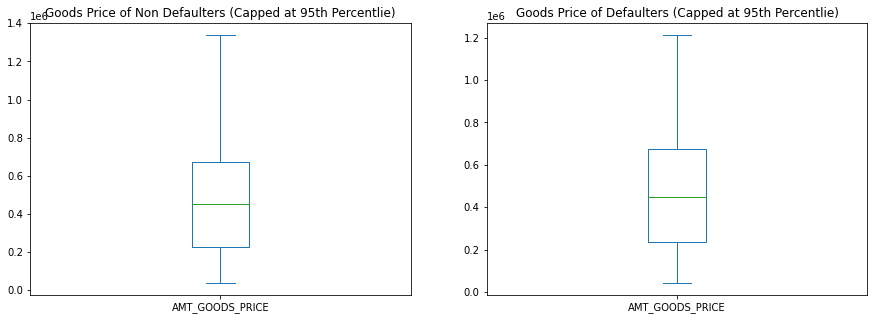

In [91]:
plt.figure(figsize=[15,5])
plt.subplot(121)
Non_Def[Non_Def['AMT_GOODS_PRICE']<np.quantile(Non_Def['AMT_GOODS_PRICE'],0.95)]['AMT_GOODS_PRICE'].plot.box()
plt.title('Goods Price of Non Defaulters (Capped at 95th Percentlie)')
plt.subplot(122)
Def[Def['AMT_GOODS_PRICE']<np.quantile(Def['AMT_GOODS_PRICE'],0.97)]['AMT_GOODS_PRICE'].plot.box()
plt.title('Goods Price of Defaulters (Capped at 95th Percentlie)')
plt.show()

- The Median of Amount of Goods Price is same for Defaulters and Non Defaulters.
- The loan Amount of Goods Price is slighlty higher for Non Defaulters in comparison to Defaulters

# Bivariate Analysis of Continous Variables

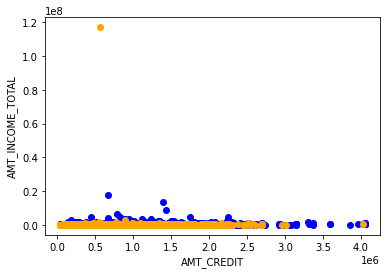

In [92]:
plt.scatter(Non_Def['AMT_CREDIT'], Non_Def['AMT_INCOME_TOTAL'], color = "blue")
plt.scatter(Def['AMT_CREDIT'], Def['AMT_INCOME_TOTAL'], color = "orange")
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

- Very Low correlation between the Amt_Income_Total and Amt_Credit

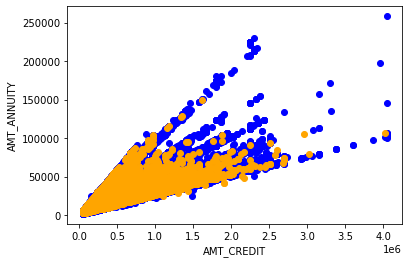

In [93]:
plt.scatter(Non_Def['AMT_CREDIT'], Non_Def['AMT_ANNUITY'], color = "blue")
plt.scatter(Def['AMT_CREDIT'], Def['AMT_ANNUITY'], color = "Orange")
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

- Their is high positive correlation between Amt_Credit and Amt_Annuity

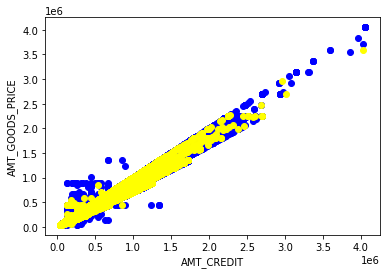

In [94]:
plt.scatter(Non_Def['AMT_CREDIT'], Non_Def['AMT_GOODS_PRICE'], color = "blue")
plt.scatter(Def['AMT_CREDIT'], Def['AMT_GOODS_PRICE'], color = "Yellow")
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

- Very High Correlation between Amt_Credit and Amt_Goods_Price

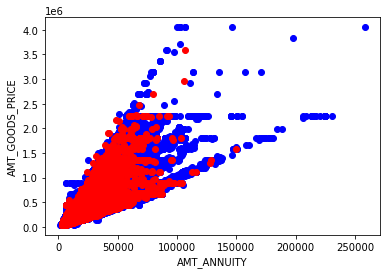

In [95]:
plt.scatter(Non_Def['AMT_ANNUITY'], Non_Def['AMT_GOODS_PRICE'], color = "blue")
plt.scatter(Def['AMT_ANNUITY'], Def['AMT_GOODS_PRICE'], color = "Red")
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

- Positive and High correaltion betwen Amt_Annuity and Amt_Goods_Price

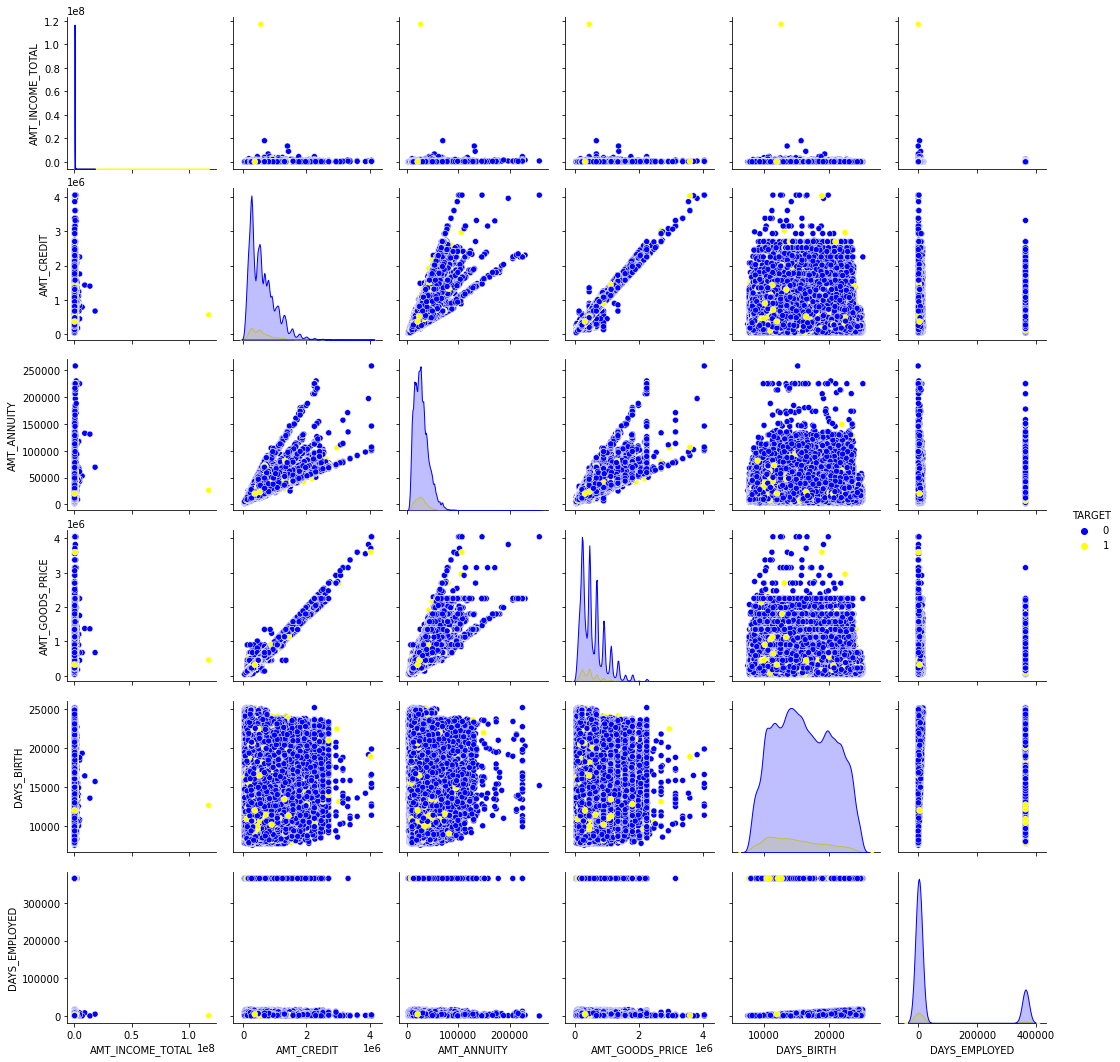

In [96]:
y = New_app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED', 'TARGET']]
y = y[(y["AMT_INCOME_TOTAL"].notnull()) & (y["AMT_CREDIT"].notnull()) & (y["AMT_ANNUITY"].notnull()) & (y["AMT_GOODS_PRICE"].notnull()) & (y["DAYS_BIRTH"].notnull()) & (y["DAYS_EMPLOYED"].notnull()) & (y["TARGET"].notnull())]

sns.pairplot(y, hue = 'TARGET', palette = ['blue', 'yellow'])
plt.show()

# Correlation Between All Numeric Variables

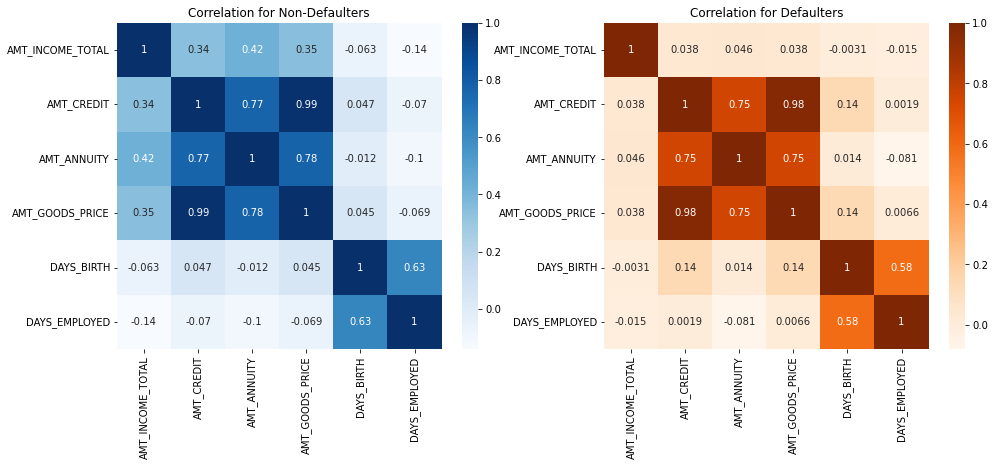

In [97]:
plt.figure(figsize = [16,6])
plt.subplot(121)
sns.heatmap(Non_Def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].corr(), annot = True, cmap = 'Blues')
plt.title('Correlation for Non-Defaulters')
plt.subplot(122)
sns.heatmap(Def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].corr(), annot = True, cmap = 'Oranges')
plt.title('Correlation for Defaulters')
plt.show()

***The Highest Correlating Variables for both the dataset are same as***:-
- AMT_CREDIT & AMT_GOODS_PRICE
- AMT_ANNUITY & AMT_GOODS_PRICE
- AMT_ CREDIT & AMT_ANNUITY

# Uploading Dataset previous_application.csv 

In [98]:
Prev_app = pd.read_csv('previous_application.csv')
Prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate Analysis

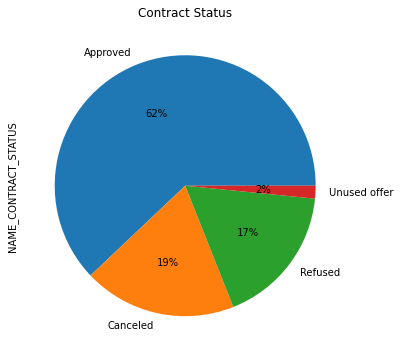

In [99]:
plt.figure(figsize=[10,6])
Prev_app.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title('Contract Status')
plt.show()

***The pie chart clearly reflects that majority of the loan applications were approved previously with rate being 62%***.

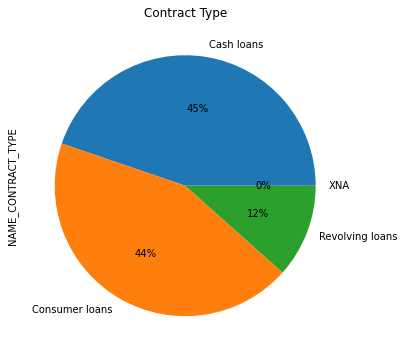

In [100]:
plt.figure(figsize=[10,6])
Prev_app.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title('Contract Type')
plt.show()

- As similar to New application dataset , the major category of loan type is Cash Loan. But we can see that previously Consumer loans were also highly applied.

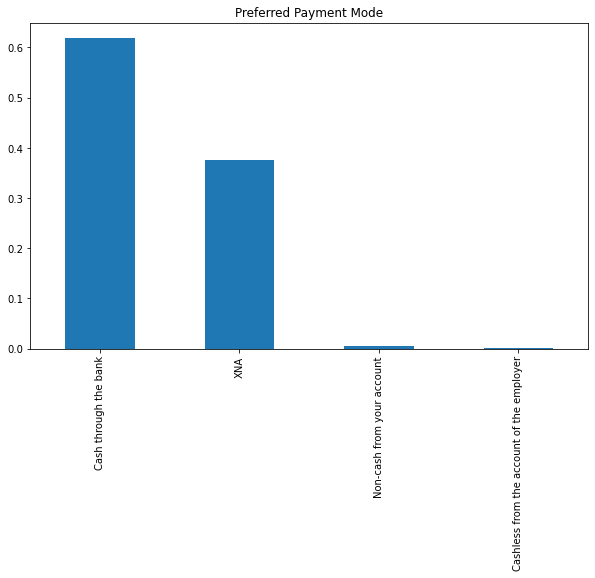

In [101]:
plt.figure(figsize=[10,6])
Prev_app.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Preferred Payment Mode')
plt.show()

- The most prefered payment method is Cash through Bank.

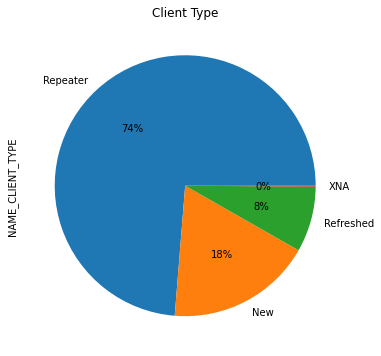

In [102]:
plt.figure(figsize=[10,6])
Prev_app.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title('Client Type')
plt.show()

- 74% of the loan applicants were Repeaters

# Correlation Between Continous Numeric Variables

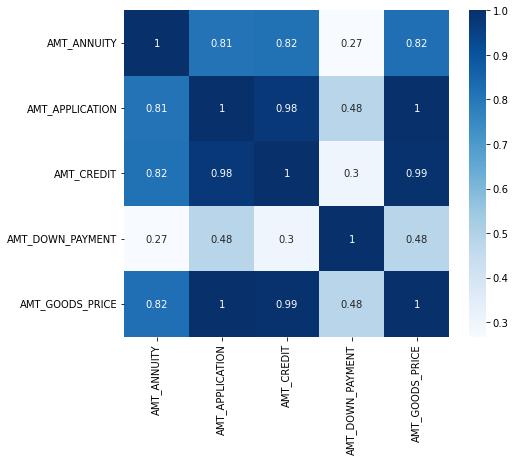

In [103]:
plt.figure(figsize = [16,6])
plt.subplot(121)
sns.heatmap(Prev_app[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE']].corr(), annot = True, cmap = 'Blues')
plt.show()

**The Highest Correlation can be observed between following variables**:-
- AMT_APPLICATION & AMT_CREDIT
- AMT_CREDIT & AMT_GOODS_PRICE
- AMT_ANNUITY & AMT_APPLICATION
- AMT_ANNUITY & AMT_GOODS_PRICE
- AMT_CREDIT & AMT_ANNUITY

***Merging both the Datasets***

In [104]:
merged = New_app.merge(Prev_app, on='SK_ID_CURR', how = 'inner')
merged.shape

(1413701, 107)

In [105]:
merged.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 107 columns):
 #    Column                        Non-Null Count    Dtype   
---   ------                        --------------    -----   
 0    SK_ID_CURR                    1413701 non-null  int64   
 1    TARGET                        1413701 non-null  int64   
 2    NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3    CODE_GENDER                   1413701 non-null  object  
 4    FLAG_OWN_CAR                  1413701 non-null  object  
 5    FLAG_OWN_REALTY               1413701 non-null  object  
 6    CNT_CHILDREN                  1413701 non-null  int64   
 7    AMT_INCOME_TOTAL              1413701 non-null  float64 
 8    AMT_CREDIT_x                  1413701 non-null  float64 
 9    AMT_ANNUITY_x                 1413701 non-null  float64 
 10   AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11   NAME_TYPE_SUITE_x             1413701 non-null  object  
 12 

In [106]:
merged.isnull().mean()*100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE_x            0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT_x                    0.00
AMT_ANNUITY_x                   0.00
AMT_GOODS_PRICE_x               0.00
NAME_TYPE_SUITE_x               0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

# Correlation of Variables of Combined Data

In [107]:
corr = merged.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
corr_1 = corr.abs().unstack().reset_index()
corr_1.columns = ['Col1', 'Col2', 'Corr']
corr_1.dropna(subset = ['Corr'], inplace = True)
corr_1.sort_values('Corr', ascending = False).head(10)

,Col1,Col2,Corr
4694,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
997,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4188,Age,DAYS_BIRTH,1.00
2462,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4695,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
460,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4542,AMT_CREDIT_y,AMT_APPLICATION,0.98
1539,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
5697,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1370,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


In [108]:
# Correaltion of Variables for Non Defaulters
corr = merged[merged['TARGET'] == 0].corr()
corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
corr_1 = corr.abs().unstack().reset_index()
corr_1.columns = ['Col1', 'Col2', 'Corr']
# corr_1.Corr = round(corr_1['Corr']*100,2)
corr_1.dropna(subset = ['Corr'], inplace = True)
corr_1.sort_values('Corr', ascending = False).head(10)

,Col1,Col2,Corr
4694,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
997,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4188,Age,DAYS_BIRTH,1.00
2462,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4695,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
460,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4542,AMT_CREDIT_y,AMT_APPLICATION,0.98
1539,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
5697,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1370,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


In [109]:
# Correaltion of Variables for Defaulters
corr = merged[merged['TARGET'] == 1].corr()
corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
corr_1 = corr.abs().unstack().reset_index()
corr_1.columns = ['Col1', 'Col2', 'Corr']
# corr_1.Corr = round(corr_1['Corr']*100,2)
corr_1.dropna(subset = ['Corr'], inplace = True)
corr_1.sort_values('Corr', ascending = False).head(10)

,Col1,Col2,Corr
997,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4188,Age,DAYS_BIRTH,1.00
4694,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
2462,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4695,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
460,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.98
4542,AMT_CREDIT_y,AMT_APPLICATION,0.98
1539,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
5697,DAYS_TERMINATION,DAYS_LAST_DUE,0.94
5542,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.89
